In [1]:
import disentangler as dt
from disentangler.dependencies import *

## Download data

In [2]:
!mkdir -p data/
!mkdir -p $dt.bonemarrow.config.DATA_DIR
!mkdir -p $dt.bonemarrow.config.DATA_DIR/models/

In [3]:
gzip_name = dt.bonemarrow.config.RAW_DATA + '.gz'
gzip_name

'data/bonemarrow/bonemarrow_data.h5ad.gz'

In [4]:
!wget \
    https://ftp.ncbi.nlm.nih.gov/geo/series/GSE194nnn/GSE194122/suppl/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad.gz \
    -O $gzip_name

In [7]:
!gzip -d $gzip_name

## Load and train

In [2]:
rna_data = dt.bonemarrow.utils.load_GEX_data()

### MIRA

In [3]:
covariates = ['Site','DonorNumber']

In [4]:
mira_model = mira.topics.TopicModel(
    *rna_data.shape,
    endogenous_key='exog',
    exogenous_key='exog',
    latent_space='dirichlet',
    feature_type='expression',
    counts_layer='counts',
    categorical_covariates= covariates,
    # parameters from tuning
    min_learning_rate = 3e-3,
    max_learning_rate = 0.15,
    #min_learning_rate = 1e-3,
    #max_learning_rate = 0.1,
    seed = 2,
    num_topics = 28,
    decoder_dropout = 0.05090897051556256
)

In [ ]:
train, test = mira.topics.SpeedyTuner.train_test_split(rna_data, seed = 0, stratify=rna_data.obs_vector('batch'))

mira_model.write_ondisk_dataset(train, dirname=dt.bonemarrow.config.DATA_DIR + 'bonemarrow_rna_train')
mira_model.write_ondisk_dataset(test, dirname=dt.bonemarrow.config.DATA_DIR + 'bonemarrow_rna_test')

del train, test

In [ ]:
# bonemarrow/rna/final/5 - 51

In [5]:
tuner = mira.topics.SpeedyTuner(
    model = mira_model,
    n_jobs = 5,
    min_topics = 15,
    max_topics = 35,
    min_trials = 64,
    max_trials = 128,
    save_name = 'bonemarrow/rna/0',
)

In [11]:
tuner.purge()

tuner.fit(
    dt.bonemarrow.config.DATA_DIR + 'bonemarrow_rna_train',
    dt.bonemarrow.config.DATA_DIR + 'bonemarrow_rna_test'
)

Trials finished: 42 | Best trial: 26 | Best score: 8.0020e+02
Press ctrl+C,ctrl+C or esc,I+I,I+I in Jupyter notebook to stop early.

Tensorboard logidr: runs/bonemarrow/rna/0
#Topics | #Trials 

     15 | ■ 
     16 | ■ ■ 
     18 | ■ ■ ■ 
     19 | ■ 
     20 | ■ 
     21 | ■ ■ 
     22 | ■ ■ ■ ■ ■ 
     23 | ■ 
     25 | ■ ■ ■ 
     26 | ■ 
     27 | ■ ■ ■ 
     28 | ■ 
     29 | ■ 
     30 | ■ ■ 
     31 | ■ ■ 
     32 | ■ ■ 
     34 | ■ 

Trial | Result (● = best so far)         | Params
 #0   |   | pruned at step: 16           | {'decoder_dropout': 0.1453, 'num_topics': 31}
 #1   |   | pruned at step: 8            | {'decoder_dropout': 0.1686, 'num_topics': 21}
 #2   |   | pruned at step: 8            | {'decoder_dropout': 0.1539, 'num_topics': 15}
 #3   | ● | completed, score: 8.0263e+02 | {'decoder_dropout': 0.0933, 'num_topics': 20}
 #4   |   | completed, score: 8.0316e+02 | {'decoder_dropout': 0.1207, 'num_topics': 25}
 #5   | ● | completed, score: 8.0115e+02 | {'decoder_dropo

In [6]:
mira_model = tuner.fetch_weights(21)

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


mira_model = tuner.fetch_weights(51)

In [7]:
mira_model.predict(rna_data)
mira_model.get_umap_features(rna_data, box_cox=0.1)

sc.pp.neighbors(rna_data, use_rep = 'X_umap_features', metric = 'manhattan')
sc.tl.umap(rna_data, min_dist = 0.1, negative_sample_rate = 3)

Predicting latent vars:   0%|          | 0/247 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


In [17]:
dt.bonemarrow.colors.CELL_PALETTE

{'B1 B': '#023fa5',
 'CD4+ T activated': '#7d87b9',
 'CD4+ T naive': '#bec1d4',
 'CD8+ T': '#d6bcc0',
 'CD8+ T naive': '#bb7784',
 'CD14+ Mono': '#8e063b',
 'CD16+ Mono': '#4a6fe3',
 'Erythroblast': '#8595e1',
 'G/M prog': '#b5bbe3',
 'HSC': '#e6afb9',
 'ID2-hi myeloid prog': '#e07b91',
 'ILC': '#d33f6a',
 'Lymph prog': '#11c638',
 'MK/E prog': '#8dd593',
 'NK': '#c6dec7',
 'Naive CD20+ B': '#ead3c6',
 'Normoblast': '#f0b98d',
 'Plasma cell': '#ef9708',
 'Proerythroblast': '#0fcfc0',
 'Transitional B': '#9cded6',
 'cDC2': '#d5eae7',
 'pDC': '#f3e1eb'}

<AxesSubplot:xlabel='X_umap1', ylabel='X_umap2'>

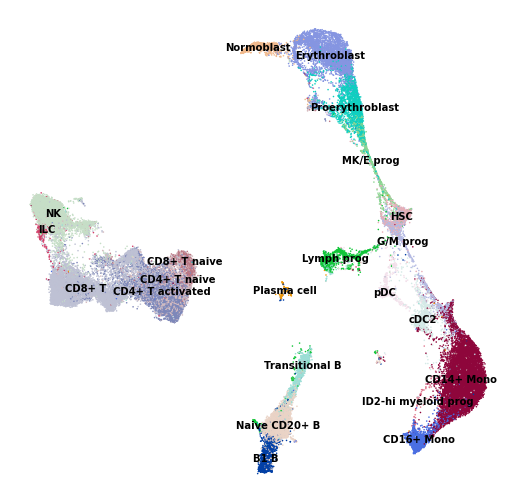

In [35]:
fig, ax = plt.subplots(1,1,figsize=(9,9))
sc.pl.embedding(rna_data, color = 'cell_type', ax = ax, frameon=False, s = 10, palette= p,
  legend_loc='on data', title = '', show = False, alpha = 1., basis = 'X_umap')

In [9]:
from sklearn.metrics import silhouette_samples

In [10]:
mira_model.get_umap_features(rna_data, box_cox=0.5)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


In [26]:
silhouette_samples(rna_data.obsm['X_umap_features'], rna_data.obs_vector('cell_type')).mean()

0.19724246809051119

In [34]:
mira_model.save(dt.bonemarrow.config.MIRA_RNA + '2')

### ScVI

In [41]:
from scvi.model import SCANVI, SCVI

In [51]:
def scvi(adata, covariates):

    # Check for counts data layer
    if "counts" not in adata.layers:
        raise TypeError(
            "Adata does not contain a `counts` layer in `adata.layers[`counts`]`"
        )

    # Defaults from SCVI github tutorials scanpy_pbmc3k and harmonization
    n_latent = 30
    n_hidden = 128
    n_layers = 2

    # copying to not return values added to adata during setup_anndata
    net_adata = adata.copy()
    SCVI.setup_anndata(net_adata, layer="counts", categorical_covariate_keys = covariates)

    vae = SCVI(
        net_adata,
        gene_likelihood="nb",
        n_layers=n_layers,
        n_latent=n_latent,
        n_hidden=n_hidden,
    )
    vae.train(train_size=1.0)

    return vae

def scanvi(adata, batch, labels, vae):

    # # Defaults from SCVI github tutorials scanpy_pbmc3k and harmonization
    # this n_epochs_scVI is now default in scvi-tools
    n_epochs_scANVI = int(np.min([10, np.max([2, round(127 / 3.0)])]))

    # STEP 2: RUN scVI to initialize scANVI
    scanvae = SCANVI.from_scvi_model(
        scvi_model=vae,
        labels_key=labels,
        unlabeled_category="UnknownUnknown",  # pick anything definitely not in a dataset
    )
    scanvae.train(max_epochs=n_epochs_scANVI, train_size=1.0)

    return scanvae

In [46]:
scvi_model = scvi(rna_data, covariates)

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.utilities.distributed:GPU available: False, used: False
INFO:pytorch_lightning.utilities.distributed:TPU avai

Epoch 127/127: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127/127 [59:44<00:00, 28.23s/it, loss=768, v_num=1]


In [48]:
scvi_model.save(dt.bonemarrow.config.SCVI)

In [52]:
scanvi_model = scanvi(rna_data, covariates, 'cell_type', scvi_model)

INFO     Training for 10 epochs.                                                             


/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.utilities.distributed:GPU available: False, used: False
INFO:pytorch_lightning.utilities.distributed:TPU avai

Epoch 10/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [10:28<00:00, 62.80s/it, loss=862, v_num=1]


In [53]:
scanvi_model.save(dt.bonemarrow.config.SCANVI)

### No disentanglement

In [7]:
mira_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_RNA + '2')\
                .set_params(covariates_dropout = 0., mask_dropout = 0., dependence_beta = 0.)

mira_model.fit(rna_data)

mira_model.save(dt.bonemarrow.config.MIRA_NO_DISENTANGLEMENT + '2')

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
INFO:mira.adata_interface.topic_model:Predicting expression from genes from col: exog
INFO:mira.adata_interface.topic_model:Using highly-variable genes from col: exog


Gathering dataset statistics:   0%|          | 0/63040 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:mira.topic_model.base:Moving model to device: cpu
